# Лабораторная работа №6
## Задание 3

## Перекрестная проверка и создание датасета

In [100]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Создание случайного датасета
data = {
    'salary': [random.randint(30000, 80000) for _ in range(1000)],
    'city': [random.choice(['Bishkek', 'London', 'Moscow']) for _ in range(1000)],
    'age': [random.randint(30, 65) for _ in range(1000)],
    'vacation_prefer': [random.choice(['Shopping', 'Beach holiday']) for _ in range(1000)],
    'transport_prefer': [random.choice(['auto', 'plane']) for _ in range(1000)],
    'target': [random.choice(['London', 'Moscow']) for _ in range(1000)]
}

# Создание DataFrame из сгенерированных данных
df = pd.DataFrame(data)
# Преобразование категориальных данных в числовые
df_encoded = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'])


In [101]:
# Выделение признаков (X) и целевой переменной (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Разделение на обучающую и тестовую выборки (80% - обучающая, 20% - тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)
# Инициализация модели классификатора
clf = RandomForestClassifier(n_estimators=100, random_state=38)

# Обучение модели на обучающей выборке
clf.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = clf.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.5350


In [102]:
import mglearn 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)

scores = cross_val_score(logreg, X, y)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.5   0.495 0.5   0.5   0.5  ]


In [103]:
scores = cross_val_score(logreg, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, X, y, cv=5, return_train_score=True)
display(res)

Cross-validation scores: [0.5   0.495 0.5   0.5   0.5  ]
Средняя правильность перекрестной проверки: 0.50


{'fit_time': array([0.00443172, 0.01672387, 0.00627613, 0.00554895, 0.00844812]),
 'score_time': array([0.00801301, 0.00571728, 0.        , 0.        , 0.        ]),
 'test_score': array([0.5  , 0.495, 0.5  , 0.5  , 0.5  ]),
 'train_score': array([0.5   , 0.4775, 0.5   , 0.5   , 0.5   ])}

In [104]:
import pandas as pd
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

print("метки wine:\n{}".format(df.target))

,fit_time,score_time,test_score,train_score
0,0.004432,0.008013,0.500,0.5000
1,0.016724,0.005717,0.495,0.4775
2,0.006276,0.000000,0.500,0.5000
3,0.005549,0.000000,0.500,0.5000
4,0.008448,0.000000,0.500,0.5000


Mean times and scores:
 fit_time       0.008286
score_time     0.002746
test_score     0.499000
train_score    0.495500
dtype: float64
метки wine:
0      London
1      London
2      Moscow
3      London
4      London
        ...  
995    London
996    Moscow
997    London
998    Moscow
999    London
Name: target, Length: 1000, dtype: object


In [105]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print("значения правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, X, y, cv=kfold)))
kfold = KFold(n_splits=3)
print("значения правильности перекрестной проверки :\n{}".format(cross_val_score(logreg, X, y, cv=kfold)))
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
print("значения правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, X, y, cv=kfold)))

значения правильности перекрестной проверки:
[0.48  0.45  0.465 0.48  0.46 ]
значения правильности перекрестной проверки :
[0.49401198 0.48348348 0.47447447]
значения правильности перекрестной проверки:
[0.47005988 0.44444444 0.47447447]


In [106]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, X, y, cv=shuffle_split)
print("значения правильности перекрестной проверки: \n{}".format(scores))

значения правильности перекрестной проверки: 
[0.486 0.458 0.492 0.516 0.486 0.5   0.494 0.52  0.478 0.464]


In [107]:
from sklearn.model_selection import LeaveOneOut
loo= LeaveOneOut()
scores = cross_val_score(logreg,X,y, cv=loo)
print("Количество итераций: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количество итераций:  1000
Средняя правильность: 0.28


## Решетчатый поиск

In [108]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)
print("размер обучающего набора:{} размер тестового набора :{}".format(X_train.shape[0], X_test.shape[0]))
best_score =0
for gamma in [0.001, 0.01, 0.1, 1, 10,100]:
    for C in [0.001, 0.01, 0.1, 1, 10,100]:
        
        svm=SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        score = svm.score(X_test, y_test)
        
        if score> best_score:
            best_score=score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("наилучшее значение правильности: {:.2f}".format(best_score))
print("наилучшее значение параметров: {}".format(best_parameters))

размер обучающего набора:750 размер тестового набора :250
наилучшее значение правильности: 0.52
наилучшее значение параметров: {'C': 1, 'gamma': 0.001}


In [109]:
from sklearn.svm import SVC
X_trainval, X_test, y_trainval, y_test= train_test_split(X,y, random_state=0)

X_train, X_valid, y_train, y_valid= train_test_split(X_trainval, y_trainval,random_state=1)
print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора:" "{}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
        svm=SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        score = svm.score(X_valid, y_valid)
        
        if score> best_score:
            best_score=score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score=svm.score(X_test, y_test)

            
print("лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score))
print("наилучшее значение параметров: {}".format(best_parameters))
print("правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score))

Размер обучающего набора: 562 размер проверочного набора: 188 размер тестового набора:250

лучшее значение правильности на проверочном наборе: 0.52
наилучшее значение параметров: {'C': 1, 'gamma': 0.01}
правильность на тестовом наборе с наилучшими параметрами: 0.47


In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np
for gamma in [0.001,0.01, 0.1, 1, 10,100]:
    for C in [0.001,0.01, 0.1, 1, 10,100]:
        
        svm=SVC(gamma=gamma, C=C)
        
        
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=10)
        score=np.mean(scores)
        
        if score> best_score:
            best_score=score
            best_parameters = {'C': C, 'gamma': gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=1, gamma=0.01)

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid={'C':[0.001,0.01, 0.1, 1, 10,100],
          'gamma': [0.001,0.01, 0.1, 1, 10,100]}
grid_search = GridSearchCV(SVC(),param_grid,cv=10)
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [112]:
print("правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))
print("наилучшее значение параметров: {}".format(grid_search.best_params_))
print("наилучшее значение кросс-валидац. правильности: {:.2f}".format(grid_search.best_score_))
print("наилучшая модель:\n{}".format(grid_search.best_estimator_))

правильность на тестовом наборе: 0.49
наилучшее значение параметров: {'C': 1, 'gamma': 0.1}
наилучшее значение кросс-валидац. правильности: 0.51
наилучшая модель:
SVC(C=1, gamma=0.1)


In [113]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.087760,0.006841,0.022612,0.003186,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.493333,0.505333,0.004,4
1,0.088338,0.006335,0.018864,0.003107,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.493333,0.505333,0.004,4
2,0.093602,0.010931,0.022563,0.006147,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.493333,0.505333,0.004,4
3,0.092059,0.008235,0.020342,0.002955,0.001,1,"{'C': 0.001, 'gamma': 1}",0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.493333,0.505333,0.004,4
4,0.094288,0.007527,0.019461,0.002129,0.001,10,"{'C': 0.001, 'gamma': 10}",0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.506667,0.493333,0.505333,0.004,4


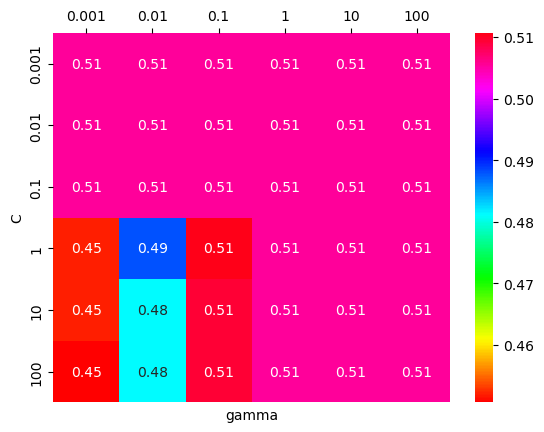

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
scores = np.array(results.mean_test_score).reshape(6,6)

ax = sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='hsv')
ax.set(xlabel="gamma", ylabel="C")
ax.xaxis.tick_top()
plt.show()

## Метрики модели

In [146]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier



# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

# Инициализация и обучение DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

# Предсказания и оценка точности
pred_most_frequent = dummy.predict(X_test)
accuracy = dummy.score(X_test, y_test)

# Вывод уникальных предсказанных меток
print('Уникальные спрогнозированные метки: {}'.format(np.unique(pred_most_frequent)))
print('Accuracy DummyClassifier: {:.2f}'.format(accuracy))


Уникальные спрогнозированные метки: [0]
Accuracy DummyClassifier: 0.48


In [147]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('правильность на тестовом наборе: {:.2f}'.format(tree.score(X_test, y_test)))

правильность на тестовом наборе: 0.83


In [148]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('правильность dummy : {:.2f}'.format(dummy.score(X_test, y_test)))
logreg  = LogisticRegression(C=0.1, max_iter=10000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('правильность logreg : {:.2f}'.format(logreg.score(X_test, y_test)))

правильность dummy : 0.48
правильность logreg : 0.85


In [149]:
from sklearn.metrics import confusion_matrix
confusion= confusion_matrix(y_test,pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[87  9]
 [21 83]]


In [150]:
print(" Наиболее часто встречающийся класс:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n Дамми-модель:")
print(confusion_matrix(y_test, pred_dummy))
print("\n Дерево решений:")
print(confusion_matrix(y_test, pred_tree))
print("\n Логическая регрессия:")
print(confusion_matrix(y_test, pred_logreg))

 Наиболее часто встречающийся класс:
[[ 96   0]
 [104   0]]

 Дамми-модель:
[[ 96   0]
 [104   0]]

 Дерево решений:
[[86 10]
 [23 81]]

 Логическая регрессия:
[[87  9]
 [21 83]]


In [165]:
from sklearn.metrics import f1_score
print("f1-мера наибольшая частота: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1-мера Дамми-модель: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1-мера Дерево решений: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1-мера Логическая регрессия: {:.2f}".format(f1_score(y_test, pred_logreg)))


f1-мера наибольшая частота: 0.00
f1-мера Дамми-модель: 0.00
f1-мера Дерево решений: 0.45
f1-мера Логическая регрессия: 0.42


In [166]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.49      1.00      0.66        99
        nine       0.00      0.00      0.00       101

    accuracy                           0.49       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.49      0.33       200



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [167]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

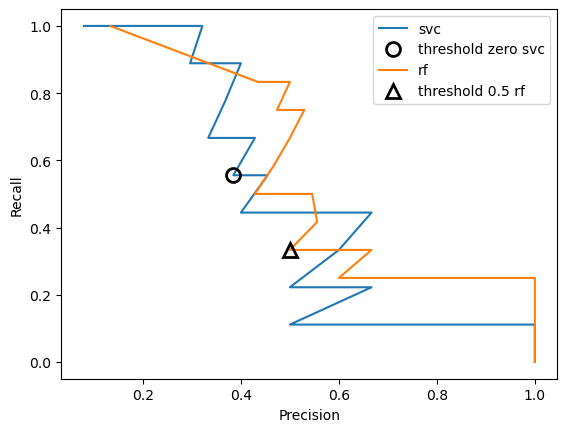

In [177]:
from sklearn.ensemble import RandomForestClassifier 
 
rf = RandomForestClassifier(n_estimators=100, random_state=38, max_features=2) 
rf.fit(X_train, y_train) 
 
# RandomForestClassifier has predict_proba, but not decision_function 
precision_rf, recall_rf, thresholds_rf = precision_recall_curve( 
    y_test, rf.predict_proba(X_test)[:, 1]) 
 
plt.plot(precision, recall, label="svc") 
# Нахождение индексов точек, близких к нулевому порогу
close_zero = np.argmin(np.abs(thresholds - 0.5))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf") 
 
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5)) 
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', 
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2) 
plt.xlabel("Precision") 
plt.ylabel("Recall") 
plt.legend(loc="best")

In [178]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("средняя точность rrandom forest: {:.3f}".format(ap_rf))
print("средняя точность svc: {:.3f}".format(ap_svc))

средняя точность rrandom forest: 0.586
средняя точность svc: 0.751


In [179]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
pred= lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.903
confusion matrix:
[[102   2]
 [  9   0]]


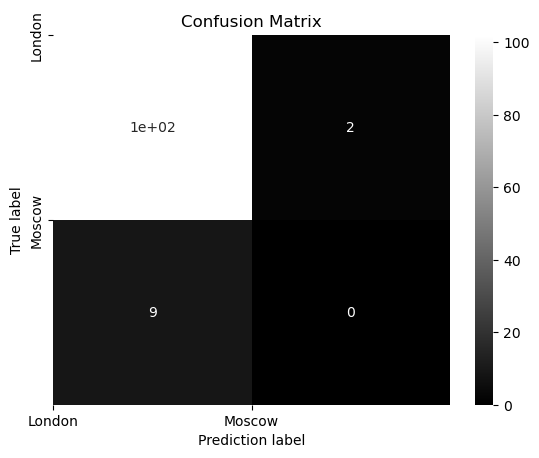

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
ax = sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='gray')
plt.xticks(ticks=np.arange(len(df['target'].unique())), labels=df['target'].unique())
plt.yticks(ticks=np.arange(len(df['target'].unique())), labels=df['target'].unique())
plt.xlabel("Prediction label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


In [181]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       104
           1       0.00      0.00      0.00         9

    accuracy                           0.90       113
   macro avg       0.46      0.49      0.47       113
weighted avg       0.85      0.90      0.87       113



In [182]:

print("Micro average f1 score: {:.3f}".format(f1_score(y_test,pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(f1_score(y_test,pred, average="macro")))

Micro average f1 score: 0.903
Macro average f1 score: 0.474


In [183]:
print("Метрика качества по умолчанию: {}".format(cross_val_score(SVC(), X, y)))
explicit_accuracy = cross_val_score(SVC(), X, y, scoring='accuracy')
print("Метрика качества явно заданная правильность: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), X, y, scoring='roc_auc')
print("AUC: {}".format(roc_auc))


Метрика качества по умолчанию: [0.88888889 0.88888889 0.88888889 0.88888889 0.88888889]
Метрика качества явно заданная правильность: [0.88888889 0.88888889 0.88888889 0.88888889 0.88888889]
AUC: [0.9225  0.95375 0.9325  0.945   0.94625]


In [175]:
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid= {'gamma': [0.0001,0.001, 0.01, 0.1, 1,10]}
grid = GridSearchCV(SVC(), param_grid= param_grid)
grid.fit(X_train, y_train)
print("решетчатый поиск с использованием правильности")
print("наилучшие параметры:", grid.best_params_)
print("наилучшее значение перекр проверки (правильность): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("правильность на  тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))

решетчатый поиск с использованием правильности
наилучшие параметры: {'gamma': 0.0001}
наилучшее значение перекр проверки (правильность): 0.894
AUC на тестовом наборе: 0.922
правильность на  тестовом наборе: 0.867


In [176]:
grid = GridSearchCV(SVC(), param_grid= param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("решетчатый поиск AUC")
print("наилучшие параметры:", grid.best_params_)
print("наилучшее значение перекр проверки (правильность): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("правильность на  тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))

решетчатый поиск AUC
наилучшие параметры: {'gamma': 0.001}
наилучшее значение перекр проверки (правильность): 0.936
AUC на тестовом наборе: 0.954
правильность на  тестовом наборе: 0.954


In [163]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score

# Загрузка данных (в данном случае генерация синтетических данных)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=37)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

# Создание и обучение модели без использования решетчатого поиска
model_before = SVC(gamma='auto')
model_before.fit(X_train, y_train)

# Предсказание на тестовом наборе данных перед использованием решетчатого поиска
predictions_before = model_before.predict(X_test)
roc_auc_before = roc_auc_score(y_test, predictions_before)
print(f"ROC AUC до применения решетчатого поиска: {roc_auc_before}")

# Создание решетчатого поиска для SVC
param_grid = {'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

# Получение наилучшей модели после решетчатого поиска
best_model = grid.best_estimator_

# Предсказание на тестовом наборе данных после применения решетчатого поиска
predictions_after = best_model.predict(X_test)
roc_auc_after = roc_auc_score(y_test, predictions_after)
print(f"ROC AUC после применения решетчатого поиска: {roc_auc_after}")


ROC AUC до применения решетчатого поиска: 0.98999899989999
ROC AUC после применения решетчатого поиска: 0.98999899989999


In [138]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score


# Создание модели (до применения перекрестной проверки)
model_before = SVC(gamma='auto')
model_before.fit(X_train, y_train)

# Оценка метрики до применения перекрестной проверки
predictions_before = model_before.predict(X_test)
roc_auc_before = roc_auc_score(y_test, predictions_before)
print(f"ROC AUC до перекрестной проверки: {roc_auc_before}")

# Применение перекрестной проверки
scores = cross_val_score(model_before, X_train, y_train, cv=5, scoring='roc_auc')

# Оценка метрики после применения перекрестной проверки
print(f"ROC AUC после перекрестной проверки: {scores.mean}")

ROC AUC до перекрестной проверки: 0.8481057180182895
ROC AUC после перекрестной проверки: <built-in method mean of numpy.ndarray object at 0x000001322F5B7BD0>


In [139]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score

# Генерация синтетических данных для примера
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели до применения перекрестной проверки
model = SVC(gamma='auto')

# Оценка метрики до применения перекрестной проверки
model.fit(X_train, y_train)
predictions_before = model.predict(X_test)
roc_auc_before = roc_auc_score(y_test, predictions_before)
print(f"ROC AUC до перекрестной проверки: {roc_auc_before}")

# Определение сетки параметров для перекрестной проверки
param_grid = {'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Создание объекта GridSearchCV
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, scoring='roc_auc')

# Подгонка модели и оценка метрики после применения перекрестной проверки
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
predictions_after = best_model.predict(X_test)
roc_auc_after = roc_auc_score(y_test, predictions_after)
print(f"ROC AUC после перекрестной проверки: {roc_auc_after}")


ROC AUC до перекрестной проверки: 0.8481057180182895
ROC AUC после перекрестной проверки: 0.8588584061903326


Значения средней правильности перекрестной проверки и оценок кросс-валидации на тестовых данных указывают на то, что модель в настоящий момент демонстрирует относительно низкую производительность, так как значение правильности около 0.5.

Средняя правильность перекрестной проверки составляет 0.50, что говорит о том, что модель в среднем правильно классифицирует только половину данных в каждом из фолдов в процессе кросс-валидации.

Результаты оценки на тестовых данных также показывают значения около 0.5, что означает, что модель не обучается особенно хорошо на имеющихся данных.

Решетчатый поиск

Правильность (accuracy) на тестовом наборе данных составляет 0.49. Это означает, что модель SVC с выбранными параметрами правильно классифицировала около 49% тестовых данных.

Наилучшие параметры модели, которые были подобраны в результате решетчатого поиска, это {'C': 1, 'gamma': 0.1}.

Наилучшее значение кросс-валидационной правильности составило 0.51. Это означает, что после подбора параметров с помощью кросс-валидации средняя точность на валидационных данных улучшилась до 51%.

Dummy модель показывает точность 0.48. Это простейшая модель, которая может предсказывать случайные результаты. Точность 0.48 означает, что другие модели должны превзойти это значение, чтобы считаться эффективными.

Модель логистической регрессии (logreg) имеет точность 0.85. Это означает, что данная модель хорошо подходит для решения задачи классификации данных.

Random Forest демонстрирует среднюю точность 0.586, а модель SVC (Support Vector Classifier) - среднюю точность 0.751. Обе эти модели показывают себя лучше, чем Dummy модель, но можно провести дополнительный анализ для определения, какая из них лучше подходит для конкретной задачи.

лучшие результаты показывают модели logreg, SVC и Random Forest. Логистическая регрессия и SVC демонстрируют более высокую точность по сравнению с Dummy и Random Forest.